<div align="right">Santiago Bran Hernandez

<div align="right">Roxana Quesada Ortega
    
<div align="right">Brillith Lorena Gutiérrez Aguilera
    
<div align="right">Juan Pablo Gómez Gamero</div>

# Diseño de malla de voladura


El presente Notebook tiene como función diseñar una malla de voladura de un banco rectangular de roca tenaz destinada a ser detonada con un diseño triangular para aumentar la fragmentación. 

### Librerías importadas para el funcionamiento del Notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Datos de entrada

+ Diseño geométrico del Banco:
 + Longitud ***L*** en *m*
 + Ancho ***A*** en *m*
 + Altura ***H*** en *m*.


+ Propiedades del Banco:
 + Densidad de la roca ***DRoca*** en *g/cm3*
 + Velocidad de onda sísmica ***Vs*** en *m/s*


+ Características de explosivos:
 + Diámetro del Barreno ***DiaBerreno*** en *mm*
 + Densidad de la carga ***DCarga*** en *g/cm3*
 + Velocidad de detonación ***Vdet*** en *m/s*
 + Valor del kilogramo de detonante ***ValorKgAnfo*** en *$COP*

In [2]:
L=20 #m
A=6 #m
H=6.5 #m

DRoca=4 #gr/cm^3
Vs=2500 #m/s

ang1=80
DiaBarreno=76.2 #mm
DCarga=0.85 #gr/cm^3
Vdet=2000 #m/s

ValorKgAnfo=7100 #$COP

### Cálculo del Burdén ***B*** en *m* y Separación ***S*** en *m*.

### Cálculo de la Sobreperforación ***J*** en *m* y el Retaque ***T*** en *m*.

In [3]:
Fe=(DCarga*Vdet**2/(1.3*3660**2))**0.33
Fr=(2.7*3500/(DRoca*Vs))**0.33
f=Fe*Fr
B=0.76*DiaBarreno*f/25.4
if DiaBarreno<165:
    B=B*0.9
S=1.15*B
print('Separación =',round(S,3),'m')
print('Burdén =',round(B,3),'m')

T=DiaBarreno*35*0.7/1000
J=0.3*B
Lf=0.6*B
print('Retaque =',round(T,3),'m')
print('Sobreperforación =',round(J,3),'m')

Separación = 1.351 m
Burdén = 1.175 m
Retaque = 1.867 m
Sobreperforación = 0.352 m


### Cálculo del número de barrenos necesarios para la voladura del banco
Donde los indices ***1*** y ***2*** referentes a la primer y segunda fila o columna en su dirección ***x*** y ***y*** respectivamente. 

In [4]:
Bancox=[0,L,L,0,0]
Bancoy=[0,0,A,A,0]

x1=int(L/S)
if (L-(x1-1)*S)/2<=2*S/3:x2=x1-1
else:x2=x1+1
if int(A/B)%2==0:y1=int(A/B/2)
else:y1=int(A/B/2)+1
y2=int(A/B/2)

Mallax1=np.zeros(x1)
Mallax2=np.zeros(x2)
Mallay1=np.zeros(y1)
Mallay2=np.zeros(y2)

for i in range(x1):
    Mallax1[i]=S*i+(L-(x1-1)*S)/2
for i in range(x2):
    Mallax2[i]=Mallax1[0]+S*i+S/2*(x1-x2)
for i in range(y1):
    Mallay1[i]=2*B*i+(A-(int(A/B)-1)*B)/2
for i in range(y2):
    Mallay2[i]=Mallay1[0]+2*B*i+B

### Detallado del borde de banco
Con su separación en ambas direcciones ***x*** y ***y*** desde la esquina inferior izquierda, además de la separación ***S*** de los barrenos y el burdén ***B***. Esta geometría se repite para todas las esquinas del banco.

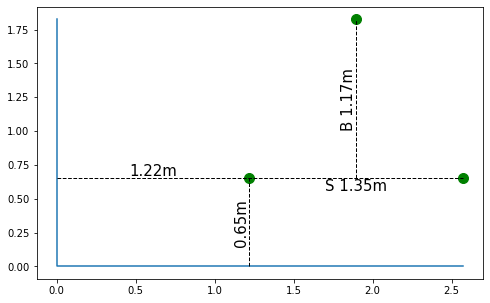

In [5]:
plt.figure(figsize=(8,5))  
plt.plot([0,0,Mallax1[1]],[Mallay2[0],0,0])
plt.plot(Mallax1[0],Mallay1[0],'go',ms=10)
plt.plot(Mallax1[1],Mallay1[0],'go',ms=10)
plt.plot(Mallax1[0]+S/2,Mallay1[0]+B,'go',ms=10)
plt.plot([Mallax1[0],Mallax1[0]],[0,Mallay1[0]],'k--',linewidth=1)
plt.plot([Mallax1[0]+S/2,Mallax1[0]+S/2],[Mallay1[0],Mallay2[0]],'k--',linewidth=1)
plt.plot([0,Mallax1[1]],[Mallay1[0],Mallay1[0]],'k--',linewidth=1)
plt.text(Mallax1[0],Mallay1[0]/2,str(round(Mallay1[0],2))+'m',rotation=90,ha='right',va='center',size=15)
plt.text(Mallax1[0]/2,Mallay1[0],str(round(Mallax1[0],2))+'m',ha='center',va='bottom',size=15)
plt.text(Mallax1[0]+S/2,Mallay1[0],'S '+str(round(S,2))+'m',ha='center',va='top',size=15)
plt.text(Mallax1[0]+S/2,(Mallay2[0]+Mallay1[0])/2,'B '+str(round(B,2))+'m',rotation=90,ha='right',va='center',size=15)
plt.show()

### Vista en planta de las perforaciones totales del banco y las dimensiones del mismo.

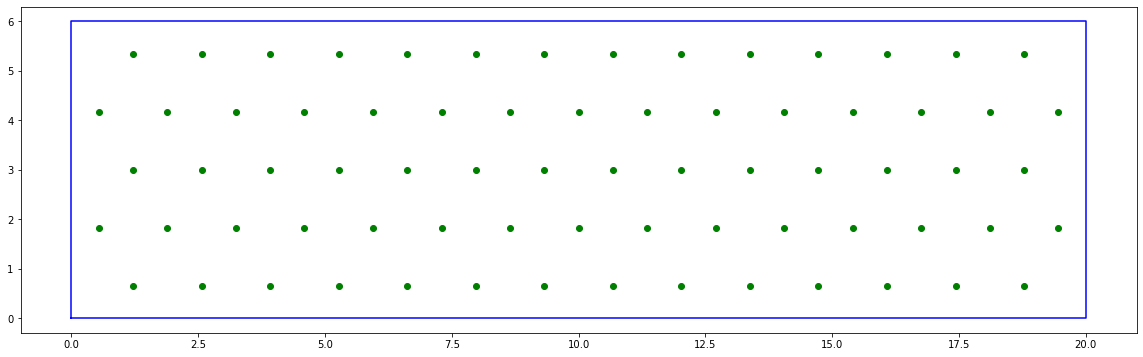

In [6]:
plt.figure(figsize=(L,A))
plt.plot(Bancox,Bancoy,'b')
for i in range(x1):
    for j in range(y1):
        plt.plot(Mallax1[i],Mallay1[j],'go')
for i in range(x2):
    for j in range(y2):
        plt.plot(Mallax2[i],Mallay2[j],'go')

### Vista del corte longitudinal.

En esta se aprecian las dimensiones del Retaque ***T***, la Columna de perforación, la Sobreperforación ***J***, la carga de columna y la carga de fondo, además del ángulo de los barrenos del borde del banco y la posición del Pentofex en la carga de fondo.

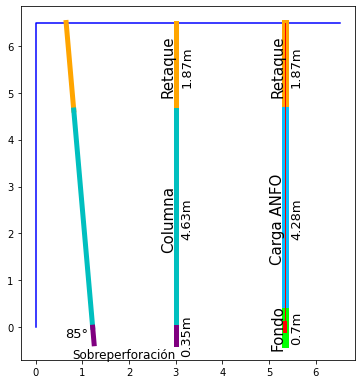

In [7]:
plt.figure(figsize=(A,H))
plt.plot([0,0,Mallay1[0]+B*5],[0,H,H],'b')
ang1=85
ang=np.radians(ang1)

plt.plot([Mallay1[0],abs((H-T)-H)/np.tan(ang)+Mallay1[0]],[H,H-T],'orange',linewidth=5)
plt.plot([abs((H-T)-H)/np.tan(ang)+Mallay1[0],Mallay1[0]+H/np.tan(ang)],[H-T,0],'c',linewidth=5)
plt.plot([Mallay1[0]+H/np.tan(ang),Mallay1[0]+H/np.tan(ang)+J/np.tan(ang)],[0,-J],'purple',linewidth=5)

plt.plot([Mallay1[1],Mallay1[1]],[H,H-T],'orange',linewidth=5)
plt.plot([Mallay1[1],Mallay1[1]],[H-T,0],'c',linewidth=5)
plt.plot([Mallay1[1],Mallay1[1]],[0,-J],'purple',linewidth=5)

plt.plot([Mallay1[2],Mallay1[2]],[H,H-T],'orange',linewidth=7)
plt.plot([Mallay1[2],Mallay1[2]],[H-T,Lf-J],'deepskyblue',linewidth=7)
plt.plot([Mallay1[2],Mallay1[2]],[Lf-J,-J],'lime',linewidth=7)
plt.plot([Mallay1[2],Mallay1[2]],[H,0],'red',linewidth=1)
plt.plot([Mallay1[2],Mallay1[2]],[.09,-.09],'red',linewidth=4)


plt.text(Mallay1[0]+H/np.tan(ang)-.1,0,str(ang1)+'°',ha='right',va='top',size=13)

plt.text(Mallay1[1],H-T/2,'Retaque',rotation=90,ha='right',va='center',size=15)
plt.text(Mallay1[1]+.1,H-T/2,str(round(T,2))+'m',rotation=90,ha='left',va='center',size=13)
plt.text(Mallay1[1],(H-T)/2,'Columna',rotation=90,ha='right',va='center',size=15)
plt.text(Mallay1[1]+.1,(H-T)/2,str(round(H-T,2))+'m',rotation=90,ha='left',va='center',size=13)
plt.text(Mallay1[1]+.1,-J/2,str(round(J,2))+'m',rotation=90,ha='left',va='center',size=13)
plt.text(Mallay1[1],-J-.1,'Sobreperforación',ha='right',va='top',size=12)

plt.text(Mallay1[2],H-T/2,'Retaque',rotation=90,ha='right',va='center',size=15)
plt.text(Mallay1[2]+.1,H-T/2,str(round(T,2))+'m',rotation=90,ha='left',va='center',size=13)
plt.text(Mallay1[2],(H-T)/2,'Carga ANFO',rotation=90,ha='right',va='center',size=15)
plt.text(Mallay1[2]+.1,(H-T)/2,str(round(H+J-Lf-T,2))+'m',rotation=90,ha='left',va='center',size=13)
plt.text(Mallay1[2]+.1,0,str(round(Lf,2))+'m',rotation=90,ha='left',va='center',size=13)
plt.text(Mallay1[2],0,'Fondo',rotation=90,ha='right',va='center',size=15)
plt.show()

### Cálculo final de los kilogramos de carga para cada sección correspondiente y su valor total. 
De acuerdo con los valores suministrados en los Datos de entrada.

In [8]:
Qc=np.pi*(DiaBarreno/20)**2*(H-T-0.18)*DCarga/10
Qf=np.pi*(DiaBarreno/10)**2*1.3*B*100*DCarga/4000
Q=Qc+Qf

Vol=L*A*H
KgAnfo=Qc*(x1*y1+x2*y2)
Total=ValorKgAnfo*KgAnfo
print('Carga de columna =',round(Qc,2),'Kg')
print('Carga de fondo =',round(Qf,2),'Kg')
print('Carga total por perforación =',round(Q,2),'Kg')
print('Total kilogramos de ANFO =',round(KgAnfo,2),'Kg')
print('Valor total ANFO = COP $',round(Total,2))

Carga de columna = 17.26 Kg
Carga de fondo = 5.92 Kg
Carga total por perforación = 23.18 Kg
Total kilogramos de ANFO = 1242.84 Kg
Valor total ANFO = COP $ 8824132.95


### Referencias



https://repositorio.uptc.edu.co/bitstream/001/2242/1/TGT-782.pdf

http://oa.upm.es/21848/1/20131007_PERFORACION_Y_VOLADURA.pdf